In [410]:
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections
import matplotlib.pyplot as plt

In [411]:
d1=pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/Biomechanical_Data_column_2C_weka.csv')

In [412]:
list(d1.keys())

['pelvic_incidence',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'class']

In [2]:
d1 = shuffle(d1)

NameError: name 'shuffle' is not defined

In [414]:
X = d1.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
y = d1.loc[:,'class']

In [415]:
y.head()

207    Abnormal
66     Abnormal
73     Abnormal
212      Normal
242      Normal
Name: class, dtype: object

In [416]:
X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
66,78.491730,22.181798,60.000000,56.309932,118.530327,27.383213
73,55.512212,20.095157,44.000000,35.417055,122.648753,34.552946
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
242,39.087264,5.536602,26.932038,33.550662,131.584420,-0.759461


In [417]:
X_train,X_test,y_train,y_test = X[:210] , X[210:], y[:210] , y[210:]


In [418]:
a = [5,10,15,20,25]
Precision = []
Recall = []
FScore = []
Accuracy = []
for i in a:
    d_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=i)
    d_fit = d_tree.fit(X_train,y_train)
    pred = d_fit.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True, sample_weight=None)
    result = precision_recall_fscore_support(y_test, pred, pos_label='Normal', average='binary')
    print("Min_sample_leaf:" + str(i) + "\t Accuracy " +str(acc) + "\t\t Precision " +str(result[0]) 
                          +"\n\t\t\t Recall "  +str(result[1]) + "\t F1 Score " + str(result[2]))
    Precision.append(result[0])
    Recall.append(result[1])
    FScore.append(result[2])
    Accuracy.append(acc)

Min_sample_leaf:5	 Accuracy 0.82		 Precision 0.692307692308
			 Recall 0.818181818182	 F1 Score 0.75
Min_sample_leaf:10	 Accuracy 0.81		 Precision 0.733333333333
			 Recall 0.666666666667	 F1 Score 0.698412698413
Min_sample_leaf:15	 Accuracy 0.86		 Precision 0.756756756757
			 Recall 0.848484848485	 F1 Score 0.8
Min_sample_leaf:20	 Accuracy 0.84		 Precision 0.814814814815
			 Recall 0.666666666667	 F1 Score 0.733333333333
Min_sample_leaf:25	 Accuracy 0.84		 Precision 0.814814814815
			 Recall 0.666666666667	 F1 Score 0.733333333333


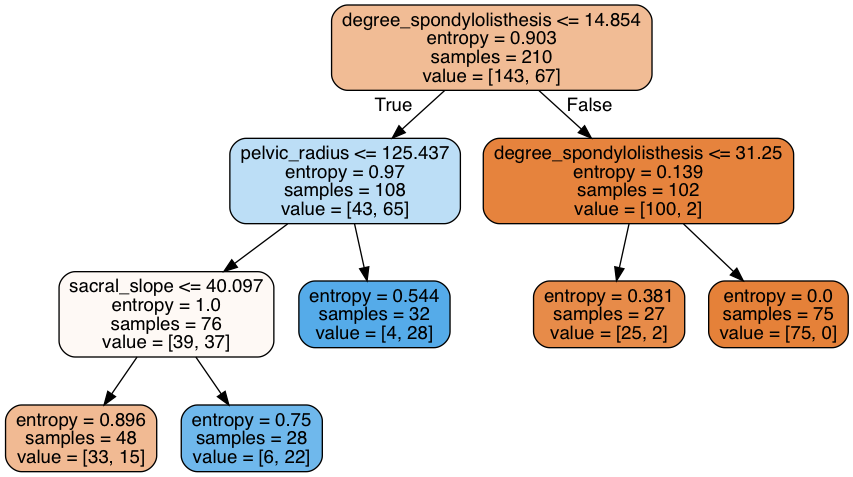

In [419]:
# Visualize data
dot_data = tree.export_graphviz(d_fit,
                                feature_names=['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
  
Image(graph.create_png())

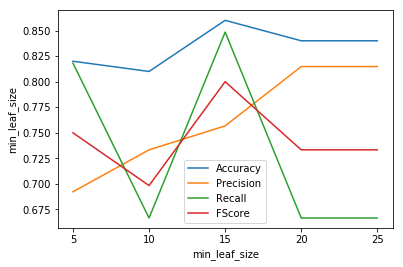

In [420]:
%matplotlib inline

plt.plot(a,Accuracy,label='Accuracy')
plt.plot(a,Precision,label='Precision')
plt.plot(a,Recall,label='Recall')
plt.plot(a,FScore,label='FScore')
plt.xticks(a,['5','10','15','20','25'])
plt.legend()
plt.xlabel("min_leaf_size")
plt.ylabel('min_leaf_size')

plt.show()

In [1]:

Precision = []
Recall = []
FScore = []
Accuracy = []
for i in range(5):
    d1 = shuffle(d1)
    X = d1.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
    y = d1.loc[:,'class']
    X_train,X_test,y_train,y_test = X[:210] , X[210:], y[:210] , y[210:]
    d_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=10)
    d_fit = d_tree.fit(X_train,y_train)
    pred = d_fit.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True, sample_weight=None)
    result = precision_recall_fscore_support(y_test, pred, pos_label='Normal', average='binary')
    print("Iteration:" + str(i) + "\t Accuracy " +str(acc) + "\t\t Precision " +str(result[0]) 
                          +"\n\t\t Recall "  +str(result[1]) + "\t F1 Score " + str(result[2]))
    Precision.append(result[0])
    Recall.append(result[1])
    FScore.append(result[2])
    Accuracy.append(acc)

NameError: name 'shuffle' is not defined

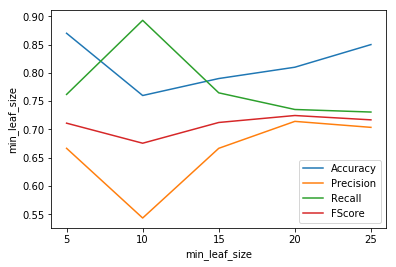

In [422]:
%matplotlib inline
plt.plot(a,Accuracy,label='Accuracy')
plt.plot(a,Precision,label='Precision')
plt.plot(a,Recall,label='Recall')
plt.plot(a,FScore,label='FScore')
plt.xticks(a,['5','10','15','20','25'])
plt.legend()
plt.xlabel("min_leaf_size")
plt.ylabel('min_leaf_size')

plt.show()

In [423]:
avg_acc = np.mean(Accuracy)
avg_pre = np.mean(Precision)
avg_FS = np.mean(FScore)
avg_rec = np.mean(Recall)

std_acc = np.std(Accuracy)
std_pre = np.std(Precision)
std_FS = np.std(FScore)
std_rec = np.std(Recall)


 Average Values
 Accuracy: 0.816
 Precision: 0.658960202438
 F1 Score: 0.708146873429
 Recall: 0.777106227106

 Standard Deviations
 Accuracy: 0.0397994974843
 Precision: 0.0608568010611
 F1 Score: 0.0169153450386
 Recall: 0.059461747903


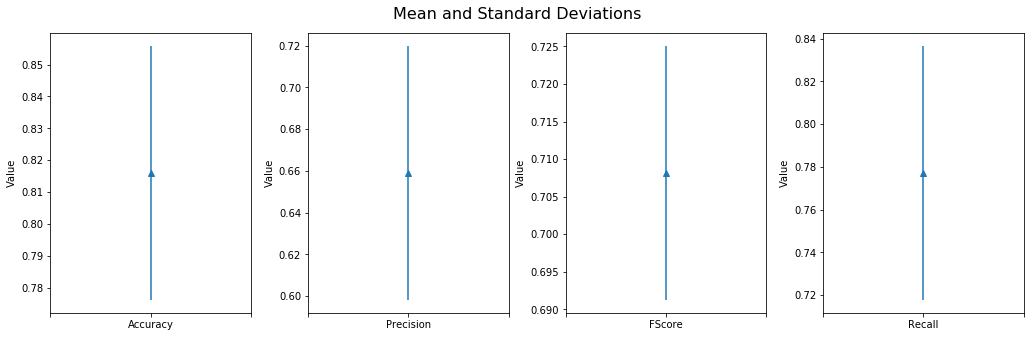

In [424]:
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.suptitle('Mean and Standard Deviations',fontsize=16)
ax[0].errorbar(1, avg_acc,std_acc, linestyle='None', marker='^',label='ab')
plt.sca(ax[0])
plt.xticks(range(3), [' ', 'Accuracy', ' '])
ax[0].set_ylabel('Value')

ax[1].errorbar(1, avg_pre,std_pre, linestyle='None', marker='^')
plt.sca(ax[1])
plt.xticks(range(3), [' ', 'Precision', ' '])
ax[1].set_ylabel('Value')

ax[2].errorbar(1, avg_FS,std_FS, linestyle='None', marker='^')
plt.sca(ax[2])
plt.xticks(range(3), [' ', 'FScore', ' '])
ax[2].set_ylabel('Value')

ax[3].errorbar(1, avg_rec,std_rec, linestyle='None', marker='^')
plt.sca(ax[3])
plt.xticks(range(3), [' ', 'Recall', ' '])
ax[3].set_ylabel('Value')

plt.tight_layout(pad=3, w_pad=0.4, h_pad=1.0)


print(" Average Values" + "\n Accuracy: " +str(avg_acc) + "\n Precision: " +str(avg_pre) + "\n F1 Score: " 
                  +str(avg_FS) + "\n Recall: " + str(avg_rec)+ "\n")
print(" Standard Deviations" + "\n Accuracy: " +str(std_acc) + "\n Precision: " +str(std_pre) + "\n F1 Score: " 
                  +str(std_FS) + "\n Recall: " + str(std_rec))

# Part 2 

In [425]:
d2=pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/BiomechanicalData_column_3C_weka.csv')
list(d2.keys())

['pelvic_incidence',
 'pelvic_tilt',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'class']

In [426]:
d2 = shuffle(d2)
X = d2.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
y = d2.loc[:,'class']
X_train,X_test,y_train,y_test = X[:210] , X[210:], y[:210] , y[210:]

In [427]:
a = [5,10,15,20,25]
Precision = []
Recall = []
FScore = []
Accuracy = []
for i in a:
    d_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=i)
    d_fit = d_tree.fit(X_train,y_train)
    pred = d_fit.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True, sample_weight=None)
    result = precision_recall_fscore_support(y_test, pred, average=None, labels=['Normal'])
    print("Min_sample_leaf:" + str(i) + "\t Accuracy " +str(acc) + "\t\t Precision " +str(result[0]) 
                          +"\n\t\t\t Recall "  +str(result[1]) + "\t F1 Score " + str(result[2]))
    Precision.append(result[0])
    Recall.append(result[1])
    FScore.append(result[2])
    Accuracy.append(acc)

Min_sample_leaf:5	 Accuracy 0.84		 Precision [ 0.7]
			 Recall [ 0.75]	 F1 Score [ 0.72413793]
Min_sample_leaf:10	 Accuracy 0.83		 Precision [ 0.67741935]
			 Recall [ 0.75]	 F1 Score [ 0.71186441]
Min_sample_leaf:15	 Accuracy 0.82		 Precision [ 0.63888889]
			 Recall [ 0.82142857]	 F1 Score [ 0.71875]
Min_sample_leaf:20	 Accuracy 0.84		 Precision [ 0.77272727]
			 Recall [ 0.60714286]	 F1 Score [ 0.68]
Min_sample_leaf:25	 Accuracy 0.84		 Precision [ 0.77272727]
			 Recall [ 0.60714286]	 F1 Score [ 0.68]


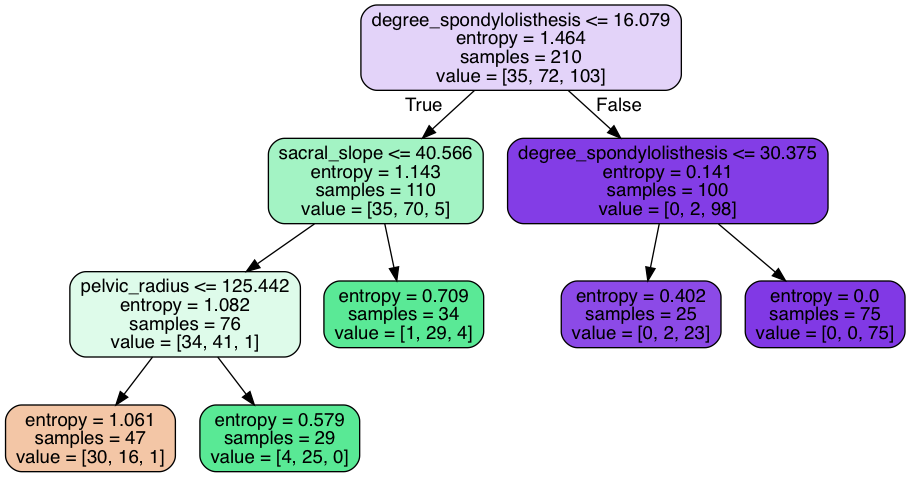

In [428]:
# Visualize data
dot_data = tree.export_graphviz(d_fit,
                                feature_names=['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
  
Image(graph.create_png())

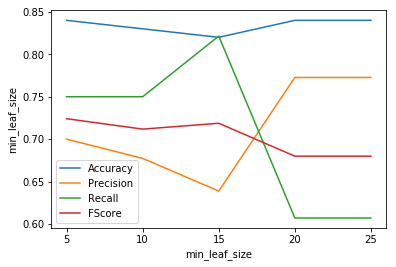

In [429]:
plt.plot(a,Accuracy,label='Accuracy')
plt.plot(a,Precision,label='Precision')
plt.plot(a,Recall,label='Recall')
plt.plot(a,FScore,label='FScore')
plt.xticks(a,['5','10','15','20','25'])
plt.legend()
plt.xlabel("min_leaf_size")
plt.ylabel('min_leaf_size')

plt.show()

In [430]:
Precision = []
Recall = []
FScore = []
Accuracy = []
for i in range(5):
    d2 = shuffle(d2)
    X = d2.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
    y = d2.loc[:,'class']
    X_train,X_test,y_train,y_test = X[:210] , X[210:], y[:210] , y[210:]
    d_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=10)
    d_fit = d_tree.fit(X_train,y_train)
    pred = d_fit.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True, sample_weight=None)
    result = precision_recall_fscore_support(y_test, pred, average=None, labels=['Normal'])
    print("Iteration:" + str(i) + "\t Accuracy " +str(acc) + "\t\t Precision " +str(result[0]) 
                          +"\n\t\t Recall "  +str(result[1]) + "\t F1 Score " + str(result[2]))
    Precision.append(result[0])
    Recall.append(result[1])
    FScore.append(result[2])
    Accuracy.append(acc)

Iteration:0	 Accuracy 0.83		 Precision [ 0.73529412]
		 Recall [ 0.78125]	 F1 Score [ 0.75757576]
Iteration:1	 Accuracy 0.83		 Precision [ 0.76666667]
		 Recall [ 0.74193548]	 F1 Score [ 0.75409836]
Iteration:2	 Accuracy 0.79		 Precision [ 0.66666667]
		 Recall [ 0.64516129]	 F1 Score [ 0.6557377]
Iteration:3	 Accuracy 0.84		 Precision [ 0.74193548]
		 Recall [ 0.74193548]	 F1 Score [ 0.74193548]
Iteration:4	 Accuracy 0.82		 Precision [ 0.81481481]
		 Recall [ 0.62857143]	 F1 Score [ 0.70967742]


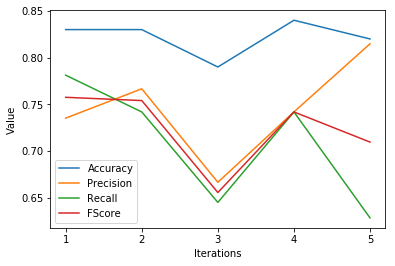

In [431]:
plt.plot(a,Accuracy,label='Accuracy')
plt.plot(a,Precision,label='Precision')
plt.plot(a,Recall,label='Recall')
plt.plot(a,FScore,label='FScore')
plt.xticks(a,['1','2','3','4','5'])
plt.legend()
plt.xlabel("Iterations")
plt.ylabel('Value')

plt.show()

In [432]:
avg_acc = np.mean(Accuracy)
avg_pre = np.mean(Precision)
avg_FS = np.mean(FScore)
avg_rec = np.mean(Recall)

std_acc = np.std(Accuracy)
std_pre = np.std(Precision)
std_FS = np.std(FScore)
std_rec = np.std(Recall)


 Average Values
 Accuracy: 0.822
 Precision: 0.745075549933
 F1 Score: 0.723804945275
 Recall: 0.707770737327

 Standard Deviations
 Accuracy: 0.0172046505341
 Precision: 0.048131550558
 F1 Score: 0.0379989773733
 Recall: 0.0598767654727


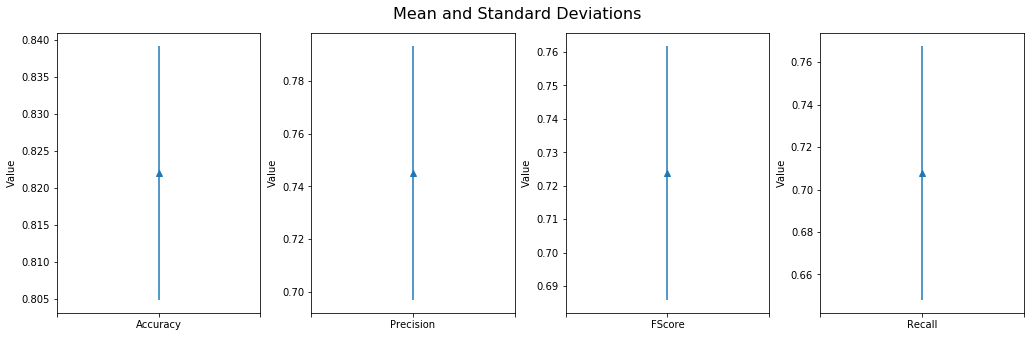

In [433]:
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.suptitle('Mean and Standard Deviations',fontsize=16)
ax[0].errorbar(1, avg_acc,std_acc, linestyle='None', marker='^',label='ab')
plt.sca(ax[0])
plt.xticks(range(3), [' ', 'Accuracy', ' '])
ax[0].set_ylabel('Value')

ax[1].errorbar(1, avg_pre,std_pre, linestyle='None', marker='^')
plt.sca(ax[1])
plt.xticks(range(3), [' ', 'Precision', ' '])
ax[1].set_ylabel('Value')

ax[2].errorbar(1, avg_FS,std_FS, linestyle='None', marker='^')
plt.sca(ax[2])
plt.xticks(range(3), [' ', 'FScore', ' '])
ax[2].set_ylabel('Value')

ax[3].errorbar(1, avg_rec,std_rec, linestyle='None', marker='^')
plt.sca(ax[3])
plt.xticks(range(3), [' ', 'Recall', ' '])
ax[3].set_ylabel('Value')

plt.tight_layout(pad=3, w_pad=0.4, h_pad=1.0)


print(" Average Values" + "\n Accuracy: " +str(avg_acc) + "\n Precision: " +str(avg_pre) + "\n F1 Score: " 
                  +str(avg_FS) + "\n Recall: " + str(avg_rec)+ "\n")
print(" Standard Deviations" + "\n Accuracy: " +str(std_acc) + "\n Precision: " +str(std_pre) + "\n F1 Score: " 
                  +str(std_FS) + "\n Recall: " + str(std_rec))

# Part 3

In [434]:

X_3 = d1.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
y_3 = d1.loc[:,'class']

In [435]:
h1, boundary1 = np.histogram(X_3['pelvic_incidence'],bins=4)
h2, boundary2 = np.histogram(X_3['pelvic_tilt numeric'],bins=4)
h3, boundary3 = np.histogram(X_3['lumbar_lordosis_angle'],bins=4)
h4, boundary4 = np.histogram(X_3['sacral_slope'],bins=4)
h5, boundary5 = np.histogram(X_3['pelvic_radius'],bins=4)
h6, boundary6 = np.histogram(X_3['degree_spondylolisthesis'],bins=4)

boundary = [boundary1, boundary2, boundary3, boundary4, boundary5, boundary6]

In [436]:
b = ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope',
                                                     'pelvic_radius', 'degree_spondylolisthesis']
k=0
for j in range(6):
    for i in range(4):
        X_3[b[j]][(X_3[b[j]]>boundary[k][i]) & (X_3[b[j]]<=boundary[k][i+1])] = i
    X_3[b[j]][X_3[b[j]]==boundary[k][0]] = 0
    k=k+1
    

In [437]:
#X_3[b[i]].value_counts()
X_3.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
71,2.0,2.0,1.0,1.0,2.0,1.0
207,1.0,1.0,2.0,1.0,2.0,0.0
187,1.0,0.0,1.0,1.0,1.0,0.0
57,0.0,1.0,0.0,0.0,1.0,0.0
220,0.0,2.0,0.0,0.0,1.0,0.0


In [446]:
 for i in range(6):
        print('\nBoundaries for - '+ b[i])
        for j in range(4):
            print(str(boundary[i][j])+ ' - ' + str(boundary[i][j+1]) + ' : ' + str(j))
    


Boundaries for - pelvic_incidence
26.14792141 - 52.0694512075 : 0
52.0694512075 - 77.990981005 : 1
77.990981005 - 103.912510803 : 2
103.912510803 - 129.8340406 : 3

Boundaries for - pelvic_tilt numeric
-6.554948347 - 7.44175463975 : 0
7.44175463975 - 21.4384576265 : 1
21.4384576265 - 35.4351606132 : 2
35.4351606132 - 49.4318636 : 3

Boundaries for - lumbar_lordosis_angle
14.0 - 41.935596375 : 0
41.935596375 - 69.87119275 : 1
69.87119275 - 97.806789125 : 2
97.806789125 - 125.7423855 : 3

Boundaries for - sacral_slope
13.3669307 - 40.382589425 : 0
40.382589425 - 67.39824815 : 1
67.39824815 - 94.413906875 : 2
94.413906875 - 121.4295656 : 3

Boundaries for - pelvic_radius
70.08257486 - 93.32969127 : 0
93.32969127 - 116.57680768 : 1
116.57680768 - 139.82392409 : 2
139.82392409 - 163.0710405 : 3

Boundaries for - degree_spondylolisthesis
-11.05817866 - 96.34213653 : 0
96.34213653 - 203.74245172 : 1
203.74245172 - 311.14276691 : 2
311.14276691 - 418.5430821 : 3


In [439]:
Precision = []
Recall = []
FScore = []
Accuracy = []
data_3 = pd.concat([X_3, y_3], axis=1)
for i in range(5):
    data_3 = shuffle(data_3)
    X_3 = data_3.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
    y_3 = data_3.loc[:,'class']
    X_train,X_test,y_train,y_test = X_3[:210] , X_3[210:], y_3[:210] , y_3[210:]
    d_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=10)
    d_fit = d_tree.fit(X_train,y_train)
    pred = d_fit.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True, sample_weight=None)
    result = precision_recall_fscore_support(y_test, pred, pos_label='Normal', average='binary')
    print("Iteration:" + str(i) + "\t Accuracy " +str(acc) + "\t\t Precision " +str(result[0]) 
                          +"\n\t\t Recall "  +str(result[1]) + "\t F1 Score " + str(result[2]))
    Precision.append(result[0])
    Recall.append(result[1])
    FScore.append(result[2])
    Accuracy.append(acc)

Iteration:0	 Accuracy 0.74		 Precision 0.473684210526
		 Recall 0.75	 F1 Score 0.58064516129
Iteration:1	 Accuracy 0.8		 Precision 0.708333333333
		 Recall 0.566666666667	 F1 Score 0.62962962963
Iteration:2	 Accuracy 0.7		 Precision 0.52
		 Recall 0.41935483871	 F1 Score 0.464285714286
Iteration:3	 Accuracy 0.72		 Precision 0.518518518519
		 Recall 0.48275862069	 F1 Score 0.5
Iteration:4	 Accuracy 0.81		 Precision 0.648648648649
		 Recall 0.8	 F1 Score 0.716417910448


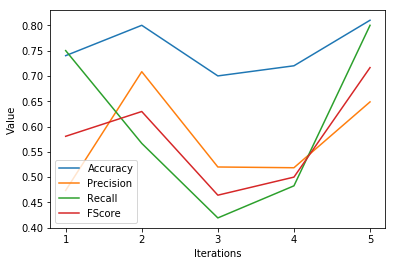

In [440]:
a=[1,2,3,4,5]
plt.plot(a,Accuracy,label='Accuracy')
plt.plot(a,Precision,label='Precision')
plt.plot(a,Recall,label='Recall')
plt.plot(a,FScore,label='FScore')
plt.xticks(a,['1','2','3','4','5'])
plt.legend()
plt.xlabel("Iterations")
plt.ylabel('Value')

plt.show()


In [441]:
avg_acc = np.mean(Accuracy)
avg_pre = np.mean(Precision)
avg_FS = np.mean(FScore)
avg_rec = np.mean(Recall)

std_acc = np.std(Accuracy)
std_pre = np.std(Precision)
std_FS = np.std(FScore)
std_rec = np.std(Recall)

 Average Values
 Accuracy: 0.754
 Precision: 0.573836942205
 F1 Score: 0.578195683131
 Recall: 0.603756025213

 Standard Deviations
 Accuracy: 0.0436348484585
 Precision: 0.0890788242574
 F1 Score: 0.0903846013243
 Recall: 0.148269206381


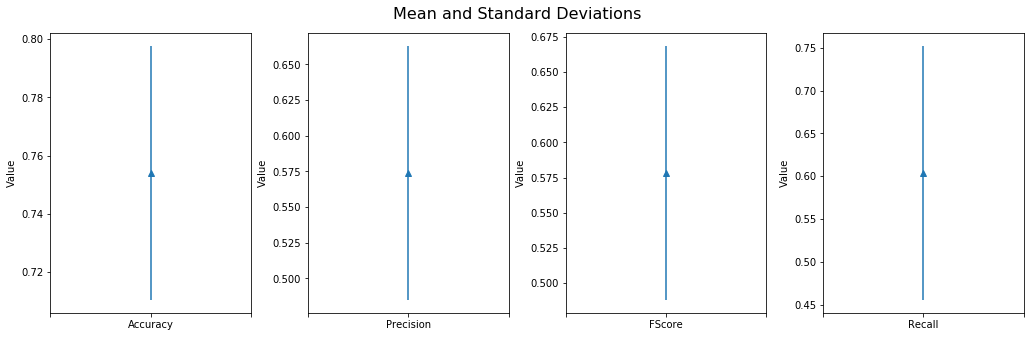

In [442]:
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.suptitle('Mean and Standard Deviations',fontsize=16)
ax[0].errorbar(1, avg_acc,std_acc, linestyle='None', marker='^',label='ab')
plt.sca(ax[0])
plt.xticks(range(3), [' ', 'Accuracy', ' '])
ax[0].set_ylabel('Value')

ax[1].errorbar(1, avg_pre,std_pre, linestyle='None', marker='^')
plt.sca(ax[1])
plt.xticks(range(3), [' ', 'Precision', ' '])
ax[1].set_ylabel('Value')

ax[2].errorbar(1, avg_FS,std_FS, linestyle='None', marker='^')
plt.sca(ax[2])
plt.xticks(range(3), [' ', 'FScore', ' '])
ax[2].set_ylabel('Value')

ax[3].errorbar(1, avg_rec,std_rec, linestyle='None', marker='^')
plt.sca(ax[3])
plt.xticks(range(3), [' ', 'Recall', ' '])
ax[3].set_ylabel('Value')

plt.tight_layout(pad=3, w_pad=0.4, h_pad=1.0)


print(" Average Values" + "\n Accuracy: " +str(avg_acc) + "\n Precision: " +str(avg_pre) + "\n F1 Score: " 
                  +str(avg_FS) + "\n Recall: " + str(avg_rec)+ "\n")
print(" Standard Deviations" + "\n Accuracy: " +str(std_acc) + "\n Precision: " +str(std_pre) + "\n F1 Score: " 
                  +str(std_FS) + "\n Recall: " + str(std_rec))